In [1]:

#import required for libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import DecisionBoundaryDisplay
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


## Multiple Layer Perceptron - Description

In the following we provide a quick summary of the fundamental concepts
involved with multiple layer perceptron (MLP).


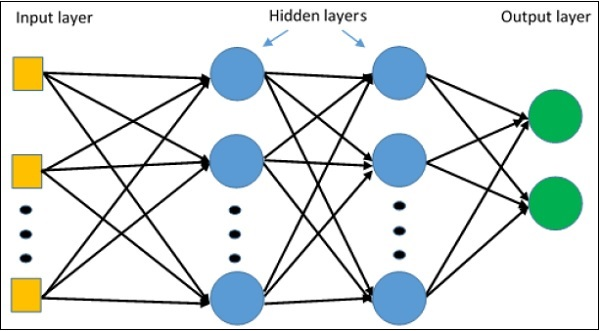


The network consists of neurons which form layers. these layers are
called the input layer, hidden layers and output layer. often the
number of neurons in the input layer corresponds to the number of
features. The neurons in this layer simply pass their value to the next
layer. The hidden layers facilitate the magic of neural networks and the
output layer is where the model, you guessed it, outputs the solution.

The following equation is the mathematical representation of going from
input to output in a neural network.

$$
\hat{y}= \sigma\left( w^{T}x+b \right)
$$

Here $u$ is the transposed vector of weights, $x$ the value of the
previous neuron and $b$ a bias. $\sigma$ is the main focus of this
researchquestion. more on this later. The goal of learning in this
context is to tune hyperparameters to minimise the sum of all errors
between $\hat{y}$ and target $y$.




Each example is led trough the network, this is called
forwardpropagation. The model produces an output which, because MLP is a
supervised method, we can compare to the expected output and construct
an average-cost-function. The goal is now to adjust weights and biases
to minimise this function via a process called backpropagation.

$$
AL(w^{T},b) = \frac{1}{m}\sum_{i=1}^{m} L \left( \hat{y}^{(i)}, y^{(i)} \right)
$$


Function L represents the way the loss for each example is calculated.
Commonly used loss-functions are regression mean squared error (MSE) for
regression problems and binary cross-entropy or binary classification.


$$
MSE = \left( y_i - \hat{y}_i  \right)^2
$$
$$
\text{Binary cross-entropy} = - \left( y_i \log{ \left( \hat{y}_i \right) } + \left( 1 - y_i \right) \log{ \left( 1 - \hat{y}_i \right)}  \right)
$$




## How do different activation functions compare for classification using large MLP?

To begin, below we introduce the different activation functions which are the subject of this study. There are dozens of activation functions, each with its advantages and disadvantages. For this study, we will focus on the four best known ones. Understanding and comparing their fundamental properties nicely underlines the importance of choosing a good activation function in practice.

In [80]:
def visualize_function_and_derivative(func, derivative, label):
    x = np.linspace(-10, 10)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].set_title(f'{label} Activation Function', fontweight="bold")
    axes[0].set_xlabel('x')
    axes[0].set_ylabel(f'{label}(x)')
    axes[0].plot(x, func(x))
    axes[0].grid(True)  # Enable gridlines
    
    axes[1].set_title(f'{label} Derivative Function', fontweight="bold")
    axes[1].set_xlabel('x')
    axes[1].set_ylabel(f'{label}(x)')
    axes[1].plot(x, derivative(x))
    axes[1].grid(True)  # Enable gridlines
    
    plt.tight_layout()
    plt.show()

In [188]:
def visualize_function_and_derivative(func, derivative, label):
    x_positive = np.linspace(0, 10, 1000)
    x_negative = np.linspace(-10, 0, 1000)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].set_title(f'{label} Activation Function', fontweight="bold")
    axes[0].set_xlabel('x')
    axes[0].set_ylabel(f'{label}(x)')
    axes[0].plot(x_negative, func(x_negative), color='blue')
    axes[0].plot(x_positive, func(x_positive), color='blue')
    axes[0].grid(True)  # Enable gridlines
    
    axes[1].set_title(f'{label} Derivative Function', fontweight="bold")
    axes[1].set_xlabel('x')
    axes[1].set_ylabel(f'{label}(x)')
    axes[1].plot(x_negative[1:], derivative(x_negative[1:]), color='blue')
    axes[1].plot(x_positive[:-1], derivative(x_positive[1:]), color='blue')
    axes[1].grid(True)  # Enable gridlines
    axes[1].set_ylim(-0.1, 1.1)
    
    
    plt.tight_layout()
    plt.show()

### Linear activation

In [189]:
def linear(x):
    ''' y = f(x) It returns the input as it is'''
    return x

In [190]:
def linear_derivative(x):
    ''' The derivative always outputs 1'''
    return np.ones_like(x)

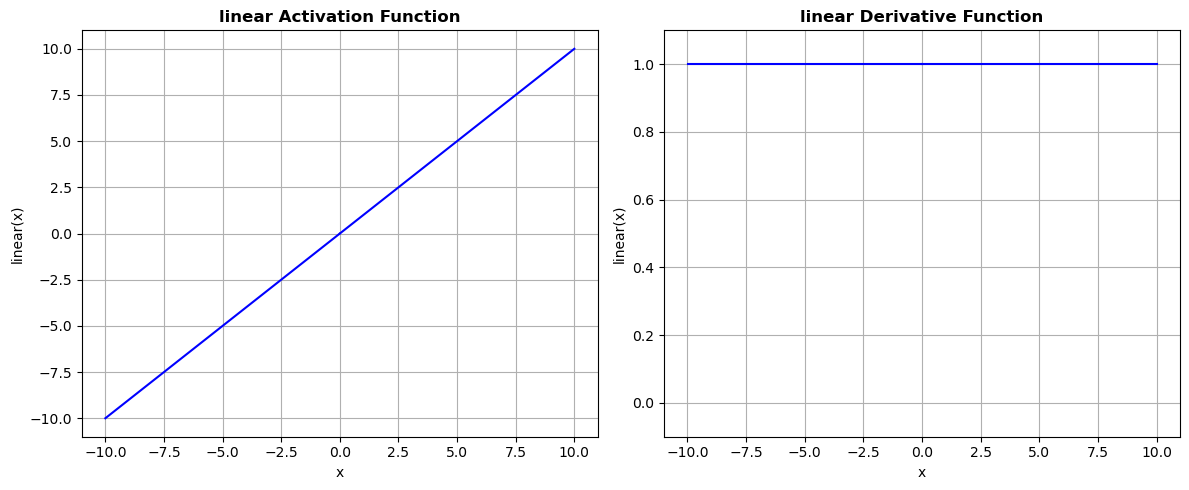

In [191]:
visualize_function_and_derivative(linear, linear_derivative, "linear")

The linear activation function also known as the identity function is probably the most easy to understand function, it just maps the input to itself so has no effect on the weighted sum of the input. 

$$
f \left( x \right) = x
$$

### Sigmoid Activation

In [192]:
def sigmoid(x):
    ''' It returns 1/(1+exp(-x)). where the values lies between zero and one '''
    return 1/(1+np.exp(-x))

In [193]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

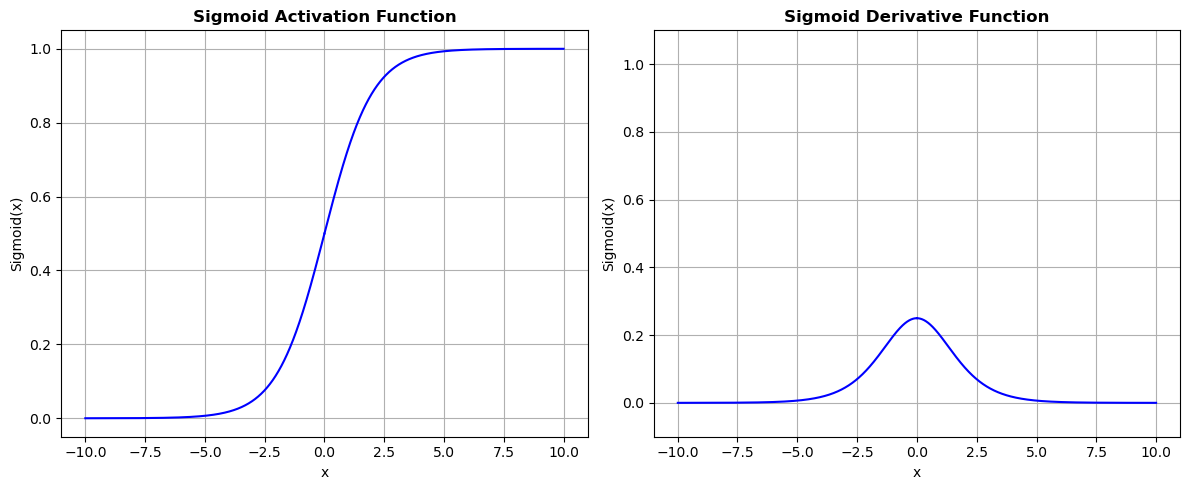

In [194]:
visualize_function_and_derivative(sigmoid, sigmoid_derivative, "Sigmoid")

The sigmoid function compresses to any real value input to a $[0, 1]$ range. The larger the input becomes, the closer the output approaches 1.  The ouput approaches 0 when the input becomes smaller. We can clearly see that the gradient for this function is significant only within the [-3, 3] range. Outside this range, the gradient is zer small and thus it is more difficult to learn. This will be discussed in detail in what follows.

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

### Tanh Activation

In [195]:
def tanh(x):
    return np.tanh(x)

In [196]:
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

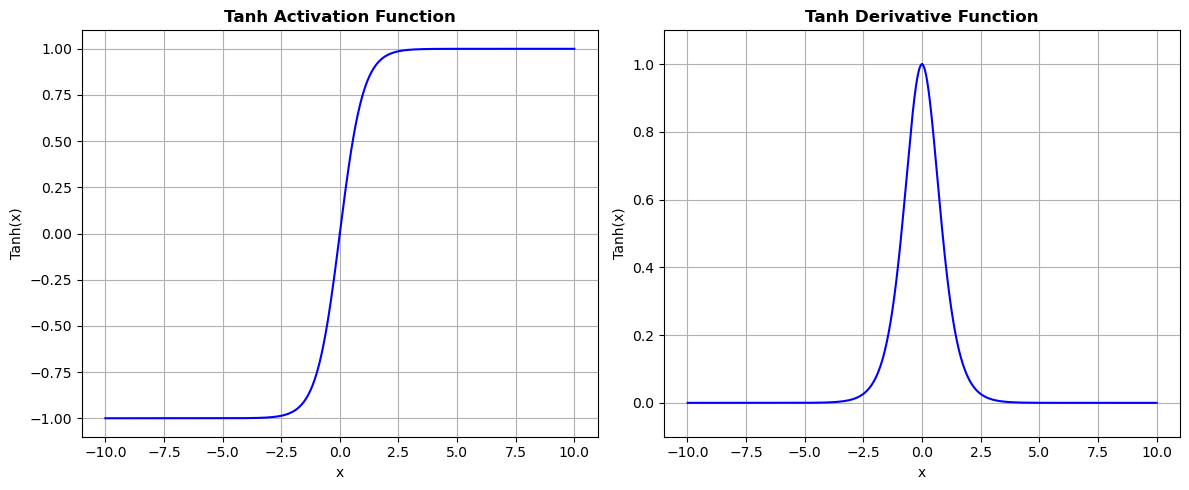

In [197]:
visualize_function_and_derivative(tanh, tanh_derivative, "Tanh")

The behavior of the Tanh activation function has mostly the same charasteristics as the sigmoid function. The most important difference is than when using tanh the input is mapped to a $[-1, 1]$ range. This also allows negative activations which helps in finding complex mappings. At first glance, the van tanh and sigmoid function are very similar but there are some important differences. The ta,h function has steeper gradients around the origin which allows for larger steps in the learning process. But the tanh is also sensitive, but slightly less sensitive than the sigmoid, to the vanishing gradient problem.

$$
f(x) = \frac{(e^x - e^{-x})}{(e^x + e^{-x})}
$$


### RELU Activation

In [198]:
def relu(x):
    x1=[]
    for i in x:
        if i<0:
            x1.append(0)
        else:
            x1.append(i)
    return x1

In [201]:
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

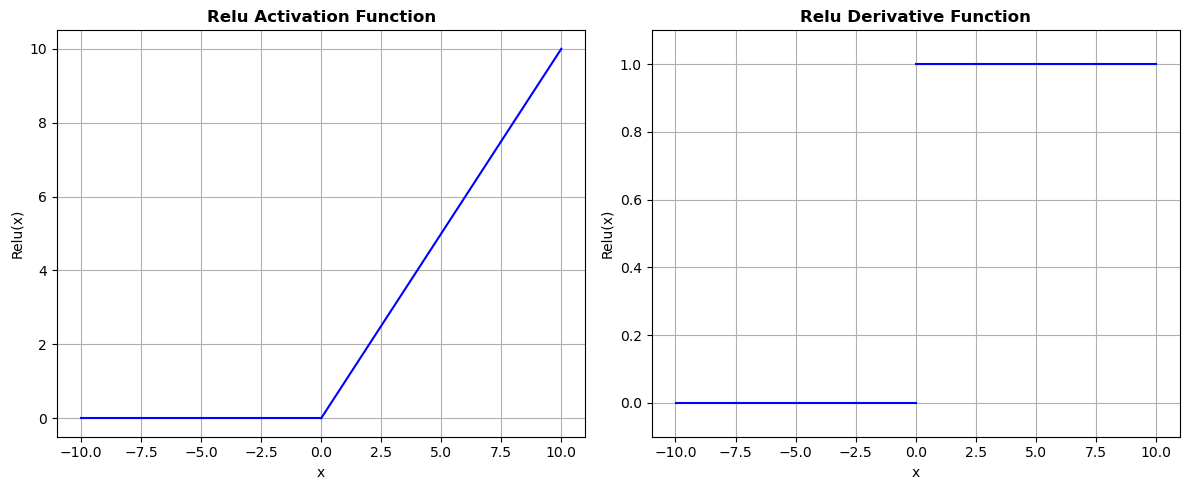

In [202]:
visualize_function_and_derivative(relu, relu_derivative, "Relu")

Rectified linear unit or simply put RELU is special because when using this function, not all neurons in the network are activated. More precisely, neurons will be activated only for outputs greater than 0. This function combines the speed of the identity function with the introduction of non-linearity. This allows enom fast cumputation compared to sigmoid and tanh.

$$
f(x) = max(0, x)
$$

# Comparison

## Using synthetic data

In [53]:
from IPython.core.display import HTML as Center
#force notebook to allign graphs for esthetics
Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

In [54]:
#discard warnings produced by model training
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [55]:
def get_trained_model_list(x_train, y_train):
    params = {
        'hidden_layer_sizes': (150, 200),
        'random_state' : 20,
        'max_iter' : 3000,
        'n_iter_no_change' : 3000,
        'early_stopping' : True
    }
    MLP_iden_model = MLPClassifier(**params, activation='identity').fit(x_train, y_train)
    MLP_logi_model = MLPClassifier(**params, activation='logistic').fit(x_train, y_train)
    MLP_tanh_model = MLPClassifier(**params, activation='tanh').fit(x_train, y_train)
    MLP_relu_model = MLPClassifier(**params, activation='relu').fit(x_train, y_train)
    return MLP_iden_model, MLP_logi_model, MLP_tanh_model, MLP_relu_model

In [56]:
def visualize_decision_boundaries(model_list, x_train):
    figure, ax = plt.subplots(2, 2, figsize=(9.84,9.84))
    ax = ax.T.flatten()
    i = 0
    
    for classifier in model_list:
        
        disp = DecisionBoundaryDisplay.from_estimator(classifier, 
                                                      x_train, 
                                                      response_method="predict",
                                                      xlabel="x_1", ylabel="x_2",
                                                      alpha=0.5, 
                                                      cmap=plt.cm.coolwarm,
                                                      ax=ax[i])
        disp.ax_.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolor="k", cmap=plt.cm.coolwarm)
        disp.ax_.set_title(f"MLP using {classifier.activation}, MSE in sample: {round(classifier.loss_, 3)}")
        i += 1
        
    plt.show()  
    

In [57]:

def visualize_combined_plots(model_list):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Visualize validation scores
    axes[0].set_title('Validation Scores During Training')
    axes[0].set_xlabel('Iteration')
    axes[0].set_ylabel('Accuracy')
    for classifier in model_list:
        validation_scores = classifier.validation_scores_
        tag = classifier.activation
        axes[0].plot(validation_scores, label=tag)
    axes[0].legend()

    # Visualize loss curve
    axes[1].set_title('Loss Curve During Training')
    axes[1].set_xlabel('Iteration')
    axes[1].set_ylabel('Loss')
    for classifier in model_list:
        loss_curve = classifier.loss_curve_
        tag = classifier.activation
        axes[1].plot(loss_curve, label=tag)
    axes[1].legend()

    plt.tight_layout()
    plt.show()


### 2.1 Circle like data

In [58]:
# Import necessary libraries
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
# Generate 2d classification dataset -- Circle like
X, y = make_circles(n_samples=200, shuffle=True,
                    noise=0.1, random_state=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
trained_models = get_trained_model_list(x_train, y_train)



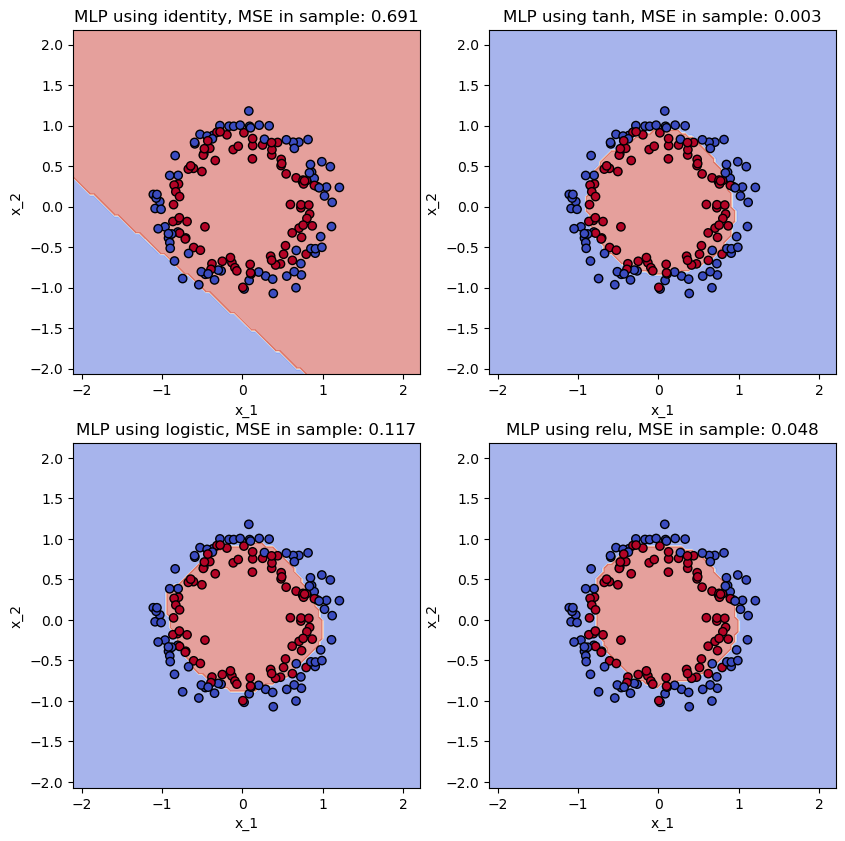

In [59]:
visualize_decision_boundaries(trained_models, x_train)

The synthetic data consists of an inner, predominantly red labelled, and an outer, predominantly blue labelled data points. The figure above visualises the discussion boundaies of the trained model for each activation function used. We see that only for using the identity function is the model unable to fit the data points. Of course, this is hardly surprising since this data is not linearly splittable and this activation function can only obtain a linear function.

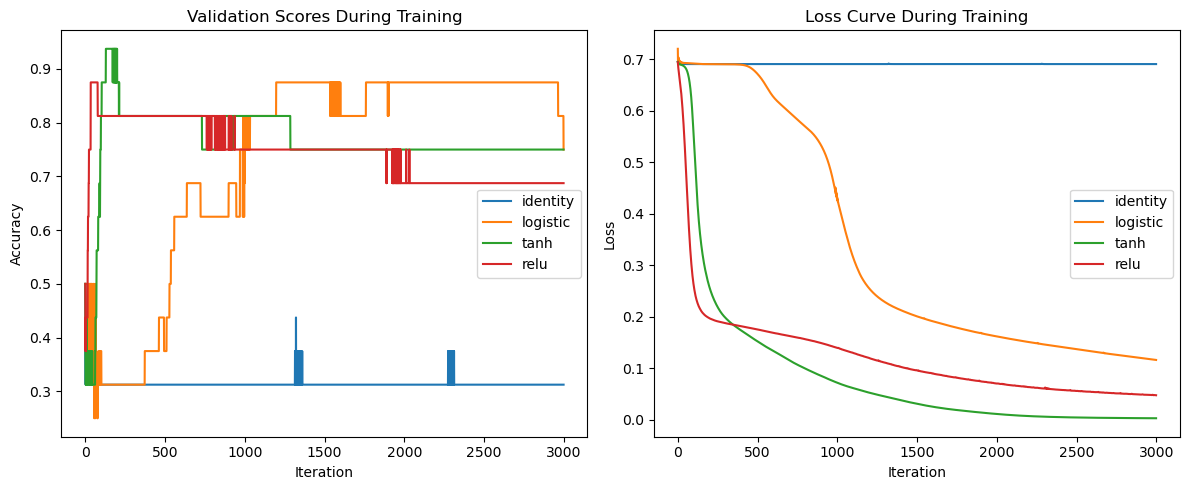

In [60]:
visualize_combined_plots(trained_models)

In line with the above findings on the inadequacy of the identity function, we see in the loss curve visualisation that this model is unable to reduce the loss. What is interesting here is that using the logistic function it takes significantly more time to converge compared to tanh and relu. Why? The answer lies in the properties of this function. As discussed in the introduction, backpropagation and thus learning uses derivations to facilitate gradient descent. The gradients for inputs outsite the [-4, 4] range are near 0. Multiple layers in a network (like the one used here) cause the convergence of the partial derivation of the loss function to 0. The weights of the neurons change only slightly as the gradient gets smaller which slows down learning enormously or sometimes even makes it impossible. This is called the vanishing gradient problem.

$$
\frac{d}{dx}\sigma\left(x  \right) = \sigma\left( x \right)\left(1 - \sigma\left( x \right) \right)
$$

But then, why not just forget about the existence of the sigmoid function? Because this function also has some good uses. Because the out always lies between 0 and 1, this function can be used in the final layer to represent probabilities. There is also a computationally interesting property in the derivation of this function. The derivative of the sigmoid function is can be calculated using the formula above. The necessary $\sigma\left( x \right)$ was already calculated during feedforward and so a lot of time can be saved for this calculation.

Quick note: the tanh function also has this property.

### 2.2 Interlocked cresent like data

In [32]:
#import the necessary libraries
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
# generate 2d classification dataset - Moon like
X, y = make_moons(n_samples=500, shuffle=True,
                  noise=0.15, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
trained_models = get_trained_model_list(x_train, y_train)

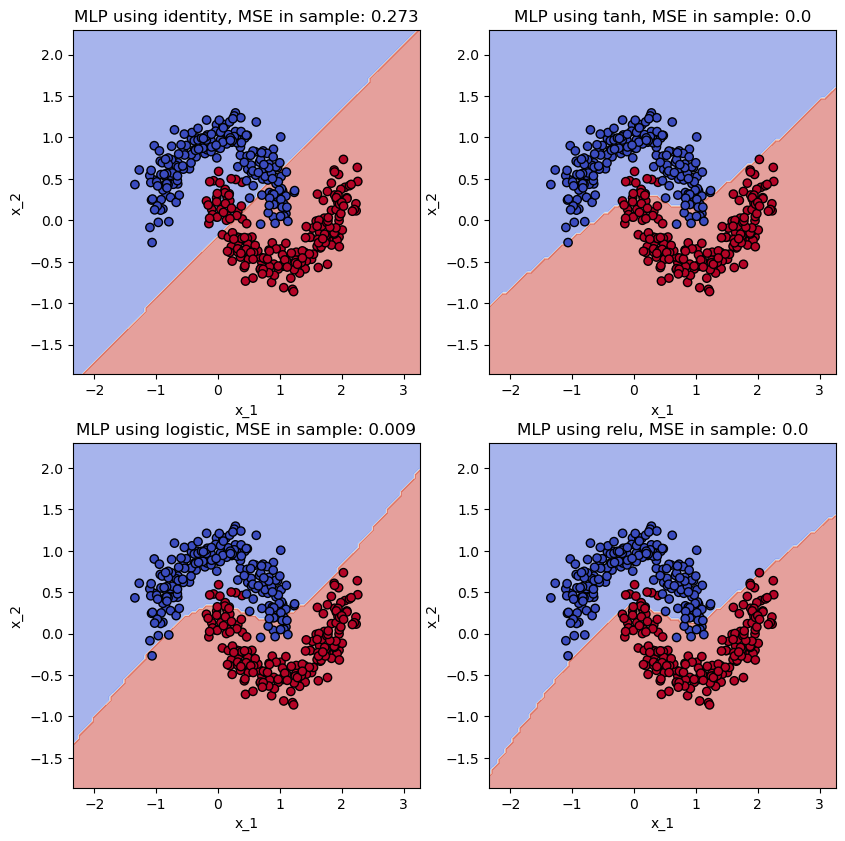

In [33]:
visualize_decision_boundaries(trained_models, x_train)

This data consists of 2 interlocking semi-circles. Both predominantly consisting of one type of label. You can clearly see that a strongly varying function is needed to classify this data correctly. Like the data discussed above, this data is also not linearly classifiable so a model with the identity function does not help us here.

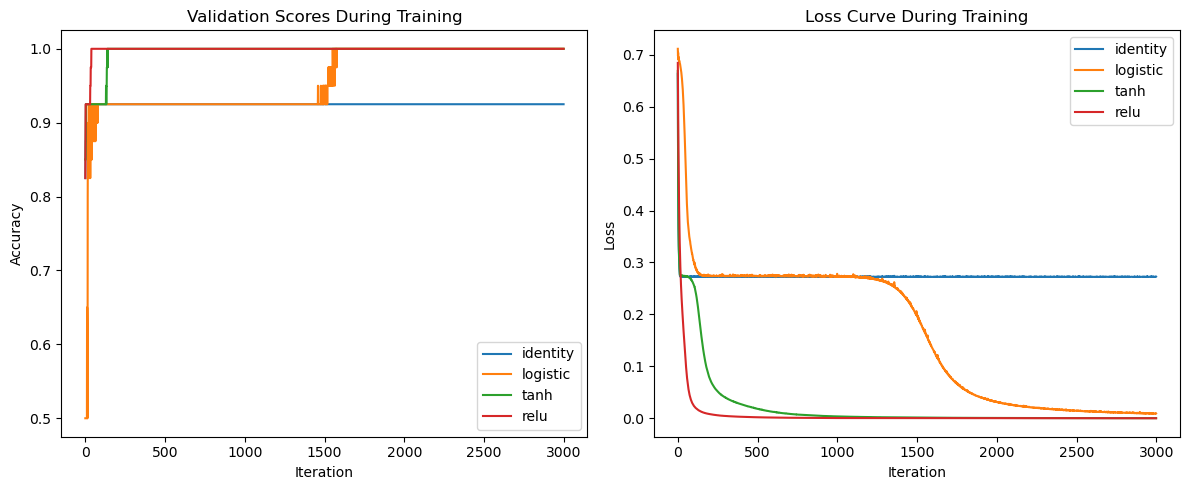

In [34]:
visualize_combined_plots(trained_models)

Again, the slow convergence of the sigmoid function is immediately noticeable. This is another case of the vanishing gradient problem here. What is also striking is that both here and in the previous example, tanh and relu both converge quickly. Why do these functions converge so much faster than the sigmoid function? This can mainly be attributed to the fact that both tanh and relu have much steeper gradients. Because of these steeper gradients, larger steps can be taken during backpropagation during gradient descent and learning is faster. This also gives a huge advantage because this way the gradient is harder to disappear.

### 2.2 Linear seperable data

In [47]:
def get_trained_model_list(x_train, y_train):
    params = {
        'hidden_layer_sizes': (150, 200),
        'random_state' : 20,
        'early_stopping' : True
    }
    MLP_iden_model = MLPClassifier(**params, activation='identity').fit(x_train, y_train)
    MLP_logi_model = MLPClassifier(**params, activation='logistic').fit(x_train, y_train)
    MLP_tanh_model = MLPClassifier(**params, activation='tanh').fit(x_train, y_train)
    MLP_relu_model = MLPClassifier(**params, activation='relu').fit(x_train, y_train)
    return MLP_iden_model, MLP_logi_model, MLP_tanh_model, MLP_relu_model

In [48]:

#import the necessary libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
 
# Generate 2d classification dataset -linear classifieble
X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=23)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
trained_models = get_trained_model_list(x_train, y_train)

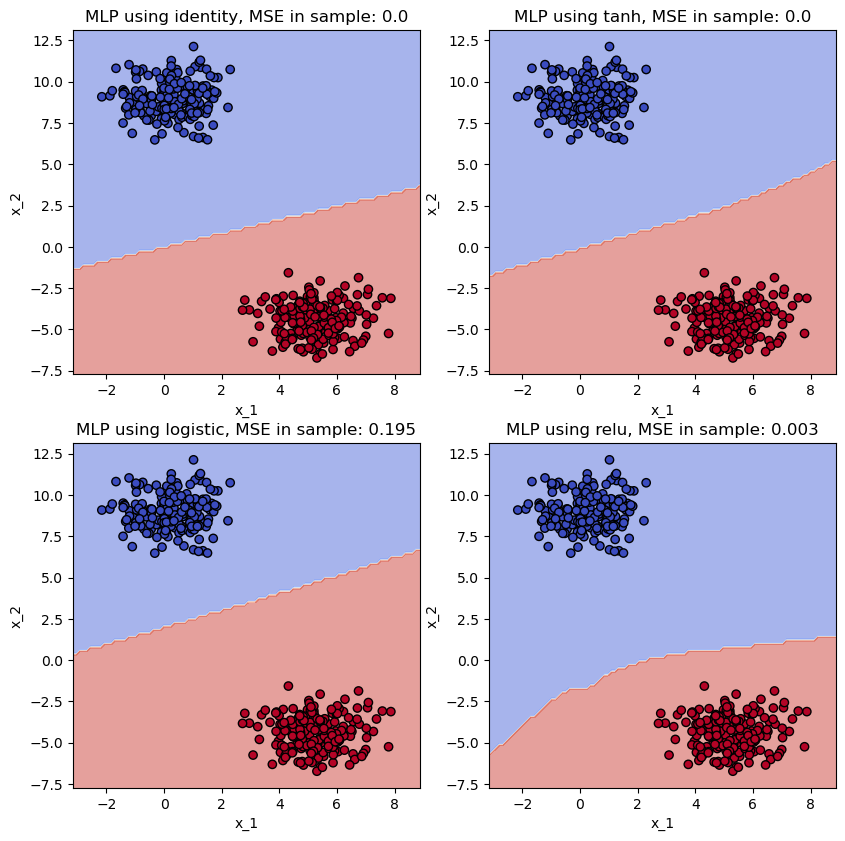

In [49]:
visualize_decision_boundaries(trained_models, x_train)

For the final synthetic experiment, data points with the same labels are clustered together so that the 2 labels are distinguishable using a linear function. As expected, all models are able to fit this data.

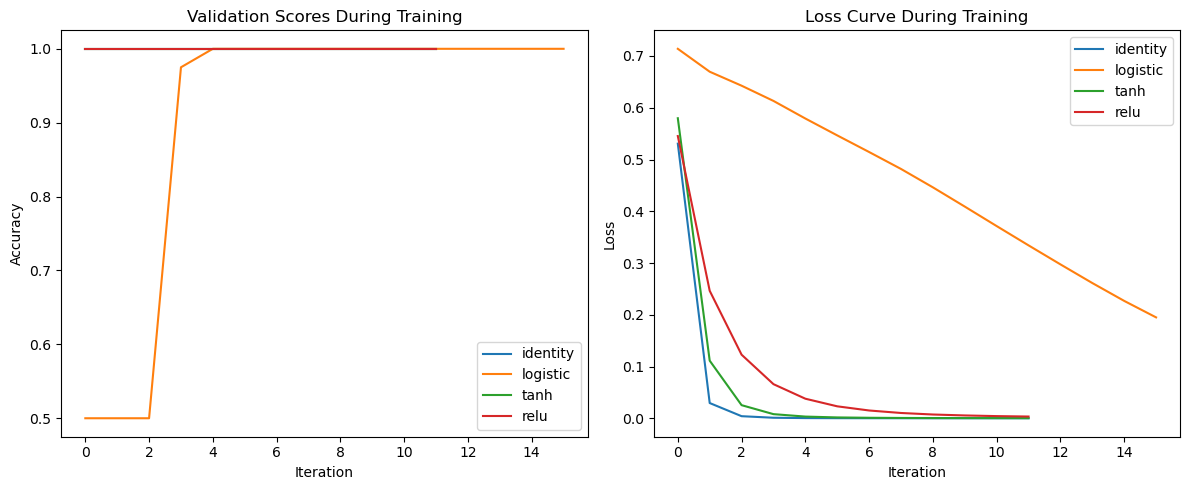

In [50]:
visualize_combined_plots(trained_models)

Without much surprise, we see that 3 of the four models converge perfectly after just a few iterations. Only the sigmoid function, which can only take small steps during backpropagation, takes longer to converge. In the context of linear classifiable data, it is interesting to choose the identity function because it provides significantly less complexity. This makes results easier to interpret compared to models using sigmoid, tanh or relu. The linear property allows insight into the relationship between input and output more easily. It should be noted, however, that this model is therefore not a "white box". The interpretability of the model is still closely related to its depth and complexity.

## Using real-world data

Having established some characteristic properties of the different activation functions on syntetic data, we now look at real world data in the context of a kaggle dataset. This dataset consists of 569 cell nuclei described by 10 features each. The goal is binary classification into classes M (malignant) and B (benign). In the following, the data is examined and preprocessed.

In [3]:
from sklearn import datasets #dataset
import seaborn as sns #visualization

In [4]:
def get_trained_model_list_real(x_train, y_train):
    params = {
        #'hidden_layer_sizes': (200, 200),
        'hidden_layer_sizes': (150, 200),
        'random_state' : 20,
        'early_stopping' : True
    }
    MLP_iden_model = MLPClassifier(**params, activation='identity').fit(x_train, y_train)
    MLP_logi_model = MLPClassifier(**params, activation='logistic').fit(x_train, y_train)
    MLP_tanh_model = MLPClassifier(**params, activation='tanh').fit(x_train, y_train)
    MLP_relu_model = MLPClassifier(**params, activation='relu').fit(x_train, y_train)
    return MLP_iden_model, MLP_logi_model, MLP_tanh_model, MLP_relu_model

In [18]:
from sklearn.metrics import mean_squared_error
def get_acurracy(trained_models, x_test, y_test):
    for classifier in trained_models:
        predictions = classifier.predict(x_test)
        print(f"Out of sample error {classifier.activation}: {mean_squared_error(y_test, predictions)}")
        
        

In [5]:
data = datasets.load_breast_cancer()

In [6]:
features = data['data']
labels = data['target']

In [7]:
df = pd.DataFrame(features, columns = data['feature_names'])
df.insert(loc=0, column='labels', value=labels)
df.head()

,labels,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


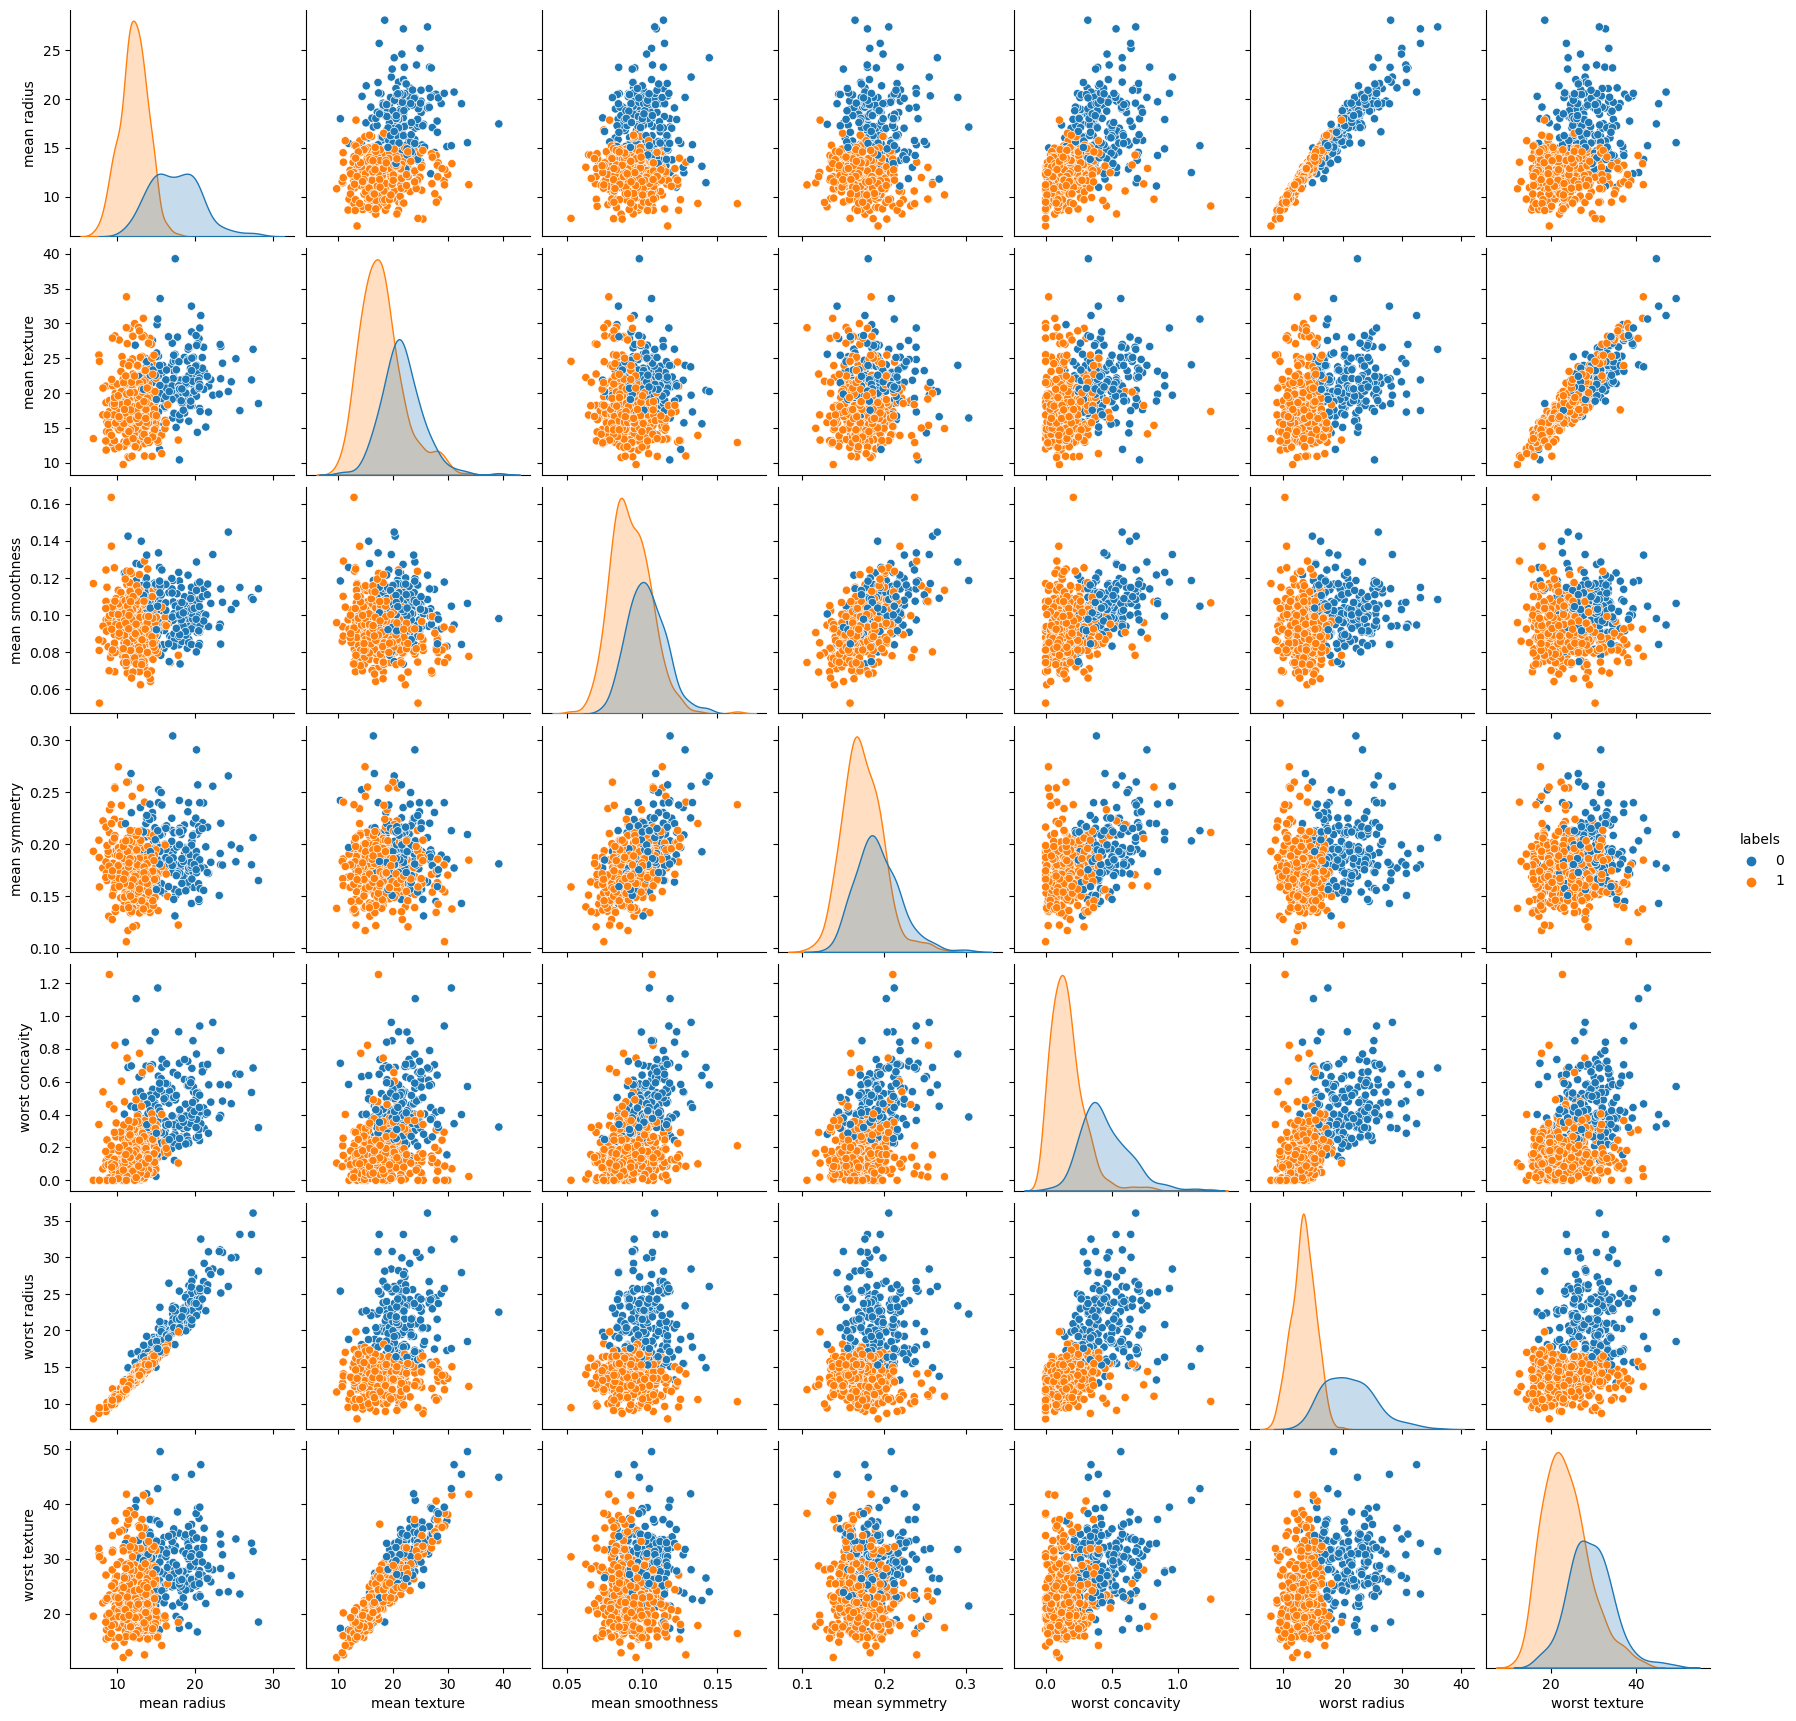

In [8]:
sns.pairplot( data=df, vars= ("mean radius", "mean texture", "mean smoothness", "mean symmetry", "worst concavity", "worst radius", "worst texture"), hue='labels' )

The visualisation above gives a nice first impression on the correlation between the features and the target. A linear split is clearly possible for certain features. This sounds like a job for the identity activation feature.

In [9]:
# remove the 'labels' column for data processing
df = df.drop(['labels'], axis = 1)

In [10]:
# gain some insight about our data
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


We observe high variation for some features in the dataset. To ensure efficient learning convergence and prevent biased weight updates, we apply standarization.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
df = pd.DataFrame(scaled, columns = data['feature_names'])
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.153111e-15,-6.568462e-15,-6.993039e-16,-8.553985e-16,6.081447e-15,-1.136369e-15,-2.997017e-16,1.023981e-15,-1.860648e-15,-1.504752e-15,...,-2.297713e-15,1.742016e-15,-1.198807e-15,6.118909e-16,-5.094929e-15,-2.122887e-15,6.118909e-16,-1.998011e-16,-2.422589e-15,2.497514e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [13]:
x_train, x_test, y_train, y_test = train_test_split(df, labels, random_state = 10, test_size = 0.2)
trained_models = get_trained_model_list_real(x_train, y_train)

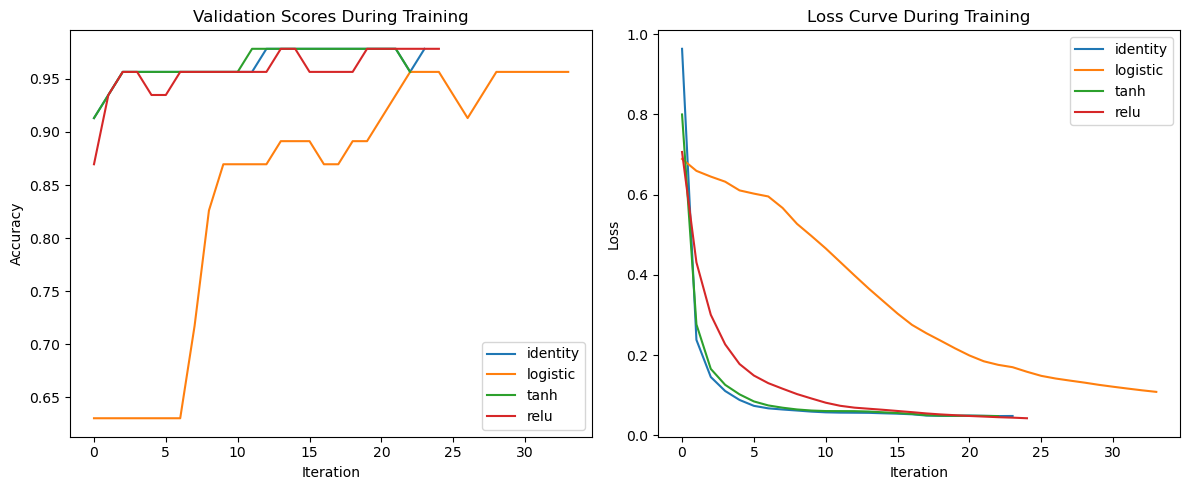

In [14]:
visualize_combined_plots(trained_models)

Here we see, perhaps unexpectedly, the model using the identieits activation function converging fastest to minimal loss. As discussed earlier, this is due to the linear divisibility of the data. This model thus gives us a relatively simple and elegant model to fit the data. Often a simple solution is superior to a more complex one. tanh and relu also converge very quickly as expected, the sigmoid needs more iterations.

In [19]:
get_acurracy(trained_models, x_test, y_test)

Out of sample error identity: 0.03508771929824561
Out of sample error logistic: 0.02631578947368421
Out of sample error tanh: 0.03508771929824561
Out of sample error relu: 0.03508771929824561


The analysis of the erros for each model on unseen data highlights an important point and provides a nice final conclusion. It is important to remember that fast and close convergence to the lowest possible loss value is not the goal of MLP. Overfitting must be taken into account. This is beyond the scope of this study but is a foundation in machine learning. We see in the above that the sigmoid function has a higher loss on more iterations but a lower error on unseen data which is desirable in this context.